<a href="https://colab.research.google.com/github/jeongmeani/Disease_AI_analysis/blob/main/AI_Code_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('./MyDrive')

Mounted at ./MyDrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import plotly.figure_factory as ff

In [ ]:
in_file = "./MyDrive/MyDrive/Test/AI_input.txt"

In [ ]:
df=pd.read_csv(in_file,sep='\t',index_col=0)

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Religion,DietGroup,FamilyHistory,Outcome
SampleIndex,,,,,,,,,,,,
Sample_1,4,128.0,70.0,12.0,NaN,34.3,0.303,24,B,A,B,0
Sample_2,5,137.0,108.0,NaN,NaN,48.8,0.227,37,B,B,B,1
Sample_3,3,170.0,64.0,37.0,225.0,34.5,0.356,30,B,B,A,1
Sample_4,1,96.0,64.0,27.0,87.0,33.2,0.289,21,A,B,A,0
Sample_5,2,68.0,62.0,13.0,15.0,20.1,0.257,23,A,A,B,0


Text(0.5, 0.98, 'Outcome content')

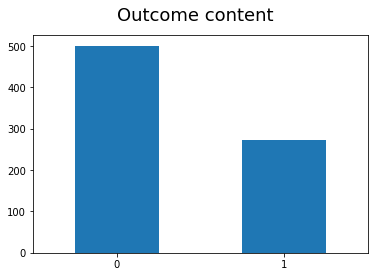

In [ ]:
df.Outcome.value_counts().plot(kind="bar",rot=0)
plt.suptitle(f'Outcome content', fontsize = 18)

In [ ]:
df.shape

(773, 12)

In [ ]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Religion,DietGroup,FamilyHistory,Outcome
count,773.000000,768.000000,756.000000,586.000000,396.000000,762.000000,773.000000,773.000000,773,773,773,773.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,A,B,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405,380,435,NaN
mean,3.873221,122.429688,73.078042,28.610922,156.020202,32.434121,0.470296,33.260026,NaN,NaN,NaN,0.351876
std,3.386115,33.746277,13.571317,10.743099,119.158695,6.913261,0.330967,11.731823,NaN,NaN,NaN,0.477865
min,0.000000,44.000000,11.000000,7.000000,14.000000,18.200000,0.078000,21.000000,NaN,NaN,NaN,0.000000
25%,1.000000,100.000000,64.000000,20.000000,76.750000,27.500000,0.241000,24.000000,NaN,NaN,NaN,0.000000
50%,3.000000,117.000000,72.000000,28.000000,125.000000,32.250000,0.370000,29.000000,NaN,NaN,NaN,0.000000
75%,6.000000,141.000000,80.000000,35.750000,190.000000,36.600000,0.624000,41.000000,NaN,NaN,NaN,1.000000


In [ ]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                17
SkinThickness               187
Insulin                     377
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Religion                      0
DietGroup                     0
FamilyHistory                 0
Outcome                       0
dtype: int64

In [ ]:
df.groupby('Outcome')['BMI','BloodPressure','SkinThickness','Insulin','Glucose'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,BMI,BloodPressure,SkinThickness,Insulin,Glucose
Outcome,,,,,
0,30.868902,71.377282,27.005181,131.313208,111.363454
1,35.286296,76.266160,31.710000,206.000000,142.840741


In [ ]:
df = df.fillna(df[['BMI','BloodPressure','SkinThickness']].mean())

### there is difference in Insulin, Glucose, so check outlier and fill mean without outlier

In [ ]:
InsulinRmoutliear_mean_negative=df[df['Insulin'] < df['Insulin'].mean() + 3 * df['Insulin'].std()].groupby('Outcome')['Insulin'].mean()[0]
InsulinRmoutliear_mean_positive=df[df['Insulin'] < df['Insulin'].mean() + 3 * df['Insulin'].std()].groupby('Outcome')['Insulin'].mean()[1]

GlucoseRmoutliear_mean_negative=df[df['Glucose'] < df['Glucose'].mean() + 3 * df['Glucose'].std()].groupby('Outcome')['Glucose'].mean()[0]
GlucoseRmoutliear_mean_positive=df[df['Glucose'] < df['Glucose'].mean() + 3 * df['Glucose'].std()].groupby('Outcome')['Glucose'].mean()[1]

In [ ]:
mask_positive = df['Outcome']==1
mask_netagive = df['Outcome']==0

In [ ]:
df.loc[mask_positive,'Insulin'] = df.loc[mask_positive,'Insulin'].fillna(InsulinRmoutliear_mean_positive)
df.loc[mask_netagive,'Insulin'] = df.loc[mask_netagive,'Insulin'].fillna(InsulinRmoutliear_mean_negative)

df.loc[mask_positive,'Glucose'] = df.loc[mask_positive,'Glucose'].fillna(GlucoseRmoutliear_mean_positive)
df.loc[mask_netagive,'Glucose'] = df.loc[mask_netagive,'Glucose'].fillna(GlucoseRmoutliear_mean_negative)

In [ ]:
df.groupby('Outcome')['BMI','BloodPressure','SkinThickness','Insulin','Glucose'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,BMI,BloodPressure,SkinThickness,Insulin,Glucose
Outcome,,,,,
0,30.897020,71.404440,27.373764,128.481358,111.359542
1,35.265324,76.160671,30.889656,197.450805,142.834340


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Religion                    0
DietGroup                   0
FamilyHistory               0
Outcome                     0
dtype: int64

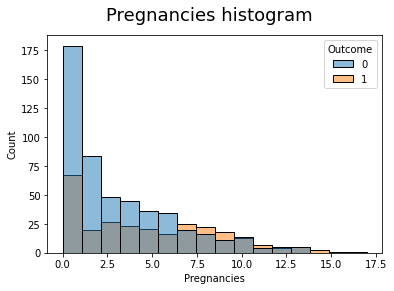

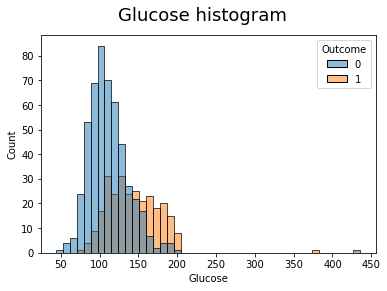

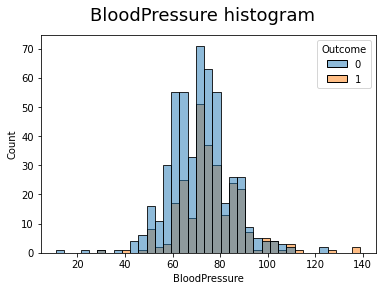

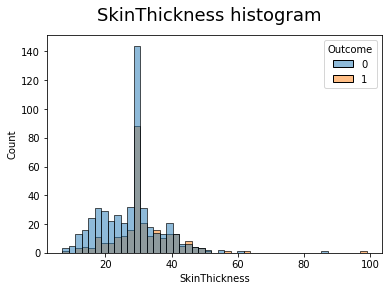

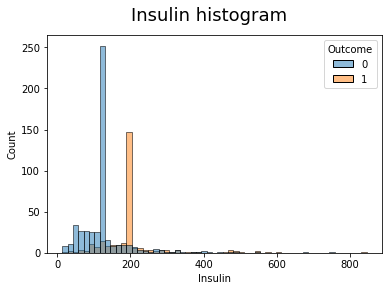

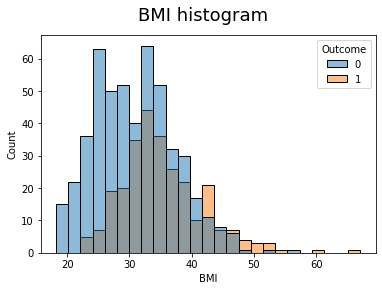

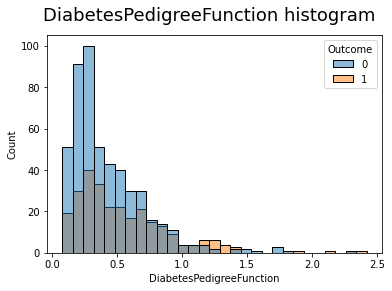

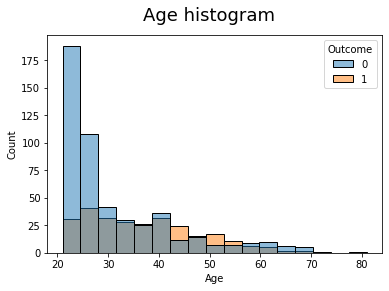

"plt.subplot(1, 2, 1)\nsns.histplot(data=df,x='Pregnancies',color = 'magenta',hue='Outcome')\n\nplt.subplot(1, 2, 2)\nsns.histplot(data=df,x='Glucose',color = 'magenta',hue='Outcome')\n\nplt.suptitle('Checking for Skewness', fontsize = 18)\nplt.show()\n\nplt.subplot(1, 2, 1)\nsns.histplot(data=df,x='BloodPressure',color = 'magenta',hue='Outcome')\n\nplt.subplot(1, 2, 2)\nsns.histplot(data=df,x='SkinThickness',color = 'magenta',hue='Outcome')\n\nplt.show()\n\nplt.subplot(1, 2, 1)\nsns.histplot(data=df,x='SkinThickness',color = 'magenta',hue='Outcome')\n\nplt.subplot(1, 2, 2)\nsns.histplot(data=df,x='Insulin',color = 'magenta',hue='Outcome')\n\nplt.show()\n\nplt.subplot(1, 2, 1)\nsns.histplot(data=df,x='BMI',color = 'magenta',hue='Outcome')\n\nplt.subplot(1, 2, 2)\nsns.histplot(data=df,x='DiabetesPedigreeFunction',color = 'magenta',hue='Outcome')\nplt.show()\n\n\nsns.histplot(data=df,x='Age',color = 'magenta',hue='Outcome')\nplt.show()\n"

In [ ]:
# check continuous variable

for i in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']:
    sns.histplot(data=df,x=i,color = 'magenta',hue='Outcome')
    plt.suptitle(f'{i} histogram', fontsize = 18)
    plt.show()

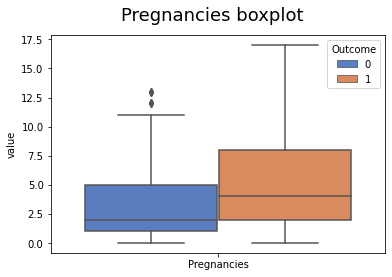

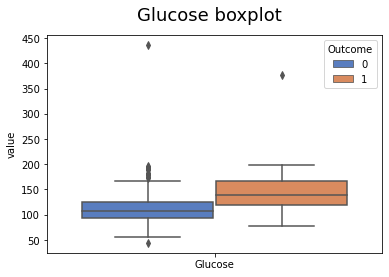

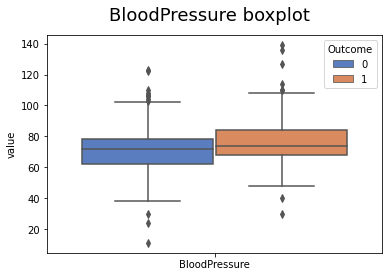

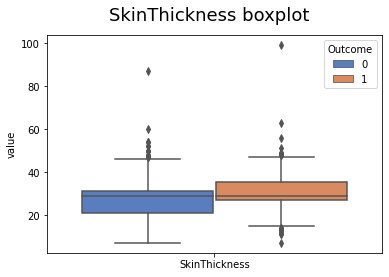

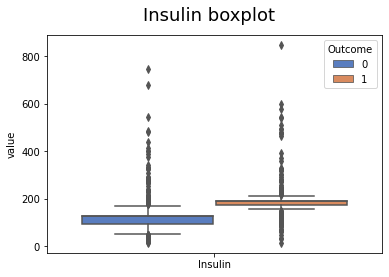

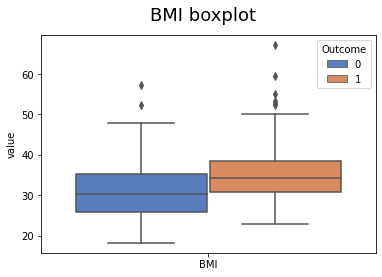

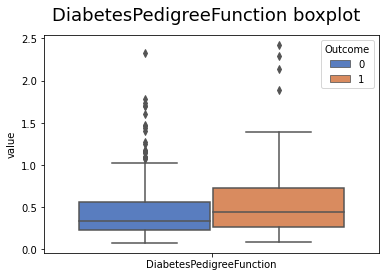

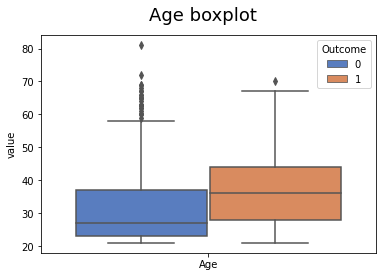

In [ ]:
for i in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']:
    df_melt=pd.melt(df, value_vars=i, id_vars='Outcome')
    g2=sns.boxplot(x='variable',y='value',hue='Outcome',data=df_melt, palette="muted")
    g2.set(xlabel=None)
    plt.suptitle(f'{i} boxplot', fontsize = 18)
    plt.show()

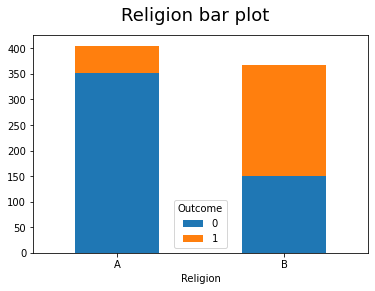

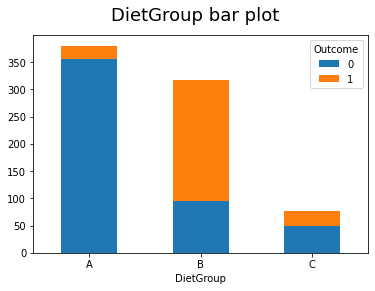

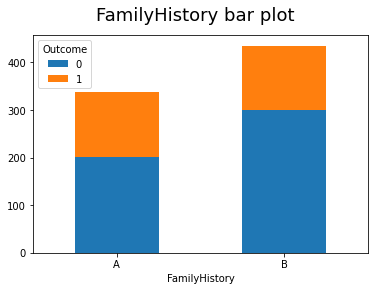

In [ ]:
# Check Categorical variable
for i in ['Religion','DietGroup','FamilyHistory']:
    pd.crosstab(df[i], df['Outcome']).plot(kind='bar', stacked=True,rot=0)
    plt.suptitle(f'{i} bar plot', fontsize = 18)

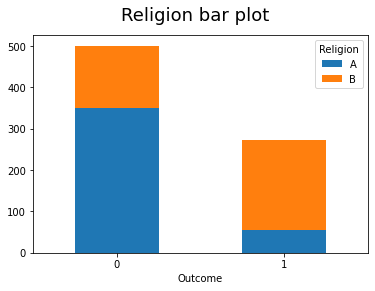

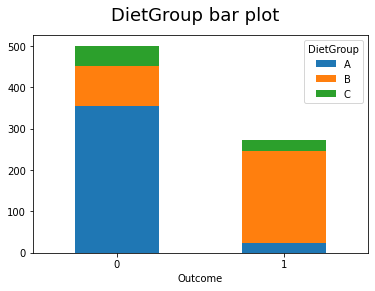

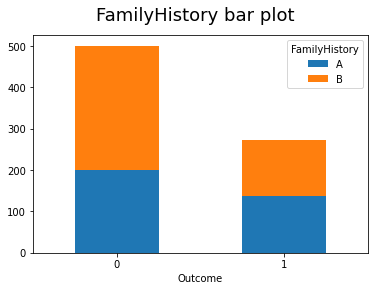

In [ ]:
for i in ['Religion','DietGroup','FamilyHistory']:
    pd.crosstab(df['Outcome'], df[i]).plot(kind='bar', stacked=True,rot=0)
    plt.suptitle(f'{i} bar plot', fontsize = 18)

# 연속형 수치를 갖고 있는 컬럼이 정규분포를 갖고있는지 확인, 정규분포를 띄면 standard scaler, 안띄면 min-max normalization 진행

In [ ]:
for i in ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']:
    k2, p = stats.normaltest(df[i])
    if p < 0.05:
        print(f"{i} does not have normal distribution in having p value {p}")

Pregnancies does not have normal distribution in having p value 1.184373608006243e-17
Glucose does not have normal distribution in having p value 1.406279896295561e-86
BloodPressure does not have normal distribution in having p value 3.5011852183259796e-16
SkinThickness does not have normal distribution in having p value 4.256219499106728e-45
Insulin does not have normal distribution in having p value 4.429620112295917e-111
BMI does not have normal distribution in having p value 6.965991668579736e-13
DiabetesPedigreeFunction does not have normal distribution in having p value 3.140529354954311e-71
Age does not have normal distribution in having p value 7.822177375186533e-27


모든 수치형 컬럼이 정규분포를 띄지 않아 min-max normalization 진행

In [ ]:
# Feature min-max scaling
def minmax_normalize(df,skip_col,eps: float=1e-11):
    df_normal=df.copy()
    stat = {}

    for col in df:
        if col in skip_col or df[col].dtype == "O":
            continue

        values = df[col]
        values_min, values_max = values.min(), values.max()
        denominator = eps if abs(values_max - values_min) < eps else (values_max - values_min)
        values_normal = (values - values_min) / denominator

        df_normal[col] = values_normal

        stat[col] = {'max': values_max,'min': values_min,'denominator': denominator}

    return (df_normal, stat)


df_normalization, stat  = minmax_normalize(df, ['Outcome'])



In [ ]:
print(df_normalization.DietGroup.unique())
ch_content={'A':0,'B':1,'C':2}

['A' 'B' 'C']


In [ ]:
df_normalization=df_normalization.replace(ch_content)

In [ ]:
x = df_normalization.drop('Outcome', axis=1).values
y = df_normalization['Outcome'].values

In [ ]:
# split data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2020,shuffle=True)

Logistic Regression test F1 Score: 0.7937141687141687
Logistic Regression train F1 Score: 0.8459481508339377
Logistic Regression test recall Score: 0.7979651162790697
Logistic Regression test precision Score: 0.7898989898989899


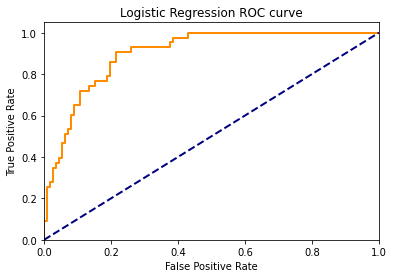

Support Vector Machine test F1 Score: 0.8211149581012595
Support Vector Machine train F1 Score: 0.8634540427846265
Support Vector Machine test recall Score: 0.8328488372093024
Support Vector Machine test precision Score: 0.8121105919003115


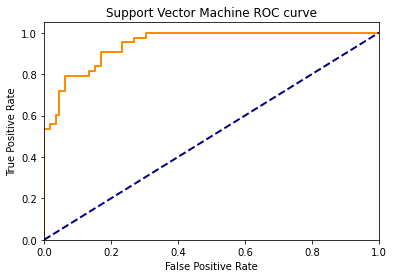

RandomForest test F1 Score: 0.8946405228758171
RandomForest train F1 Score: 1.0
RandomForest test recall Score: 0.8918189368770764
RandomForest test precision Score: 0.8975979772439949


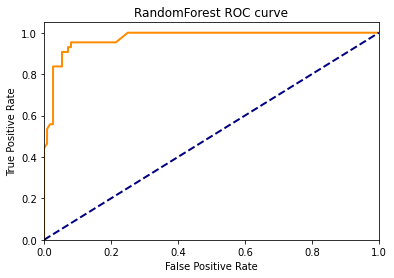

XGBoost test F1 Score: 0.9121179320653574
XGBoost train F1 Score: 0.9913512000559792
XGBoost test recall Score: 0.9150747508305648
XGBoost test precision Score: 0.9092956592956594


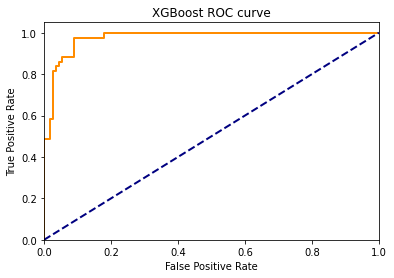

In [ ]:
# train and valid

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import f1_score # label data is unbalanced so calculate F1-macro score
# LogisticRegression

def auc_curve(model, x_test, y_test, model_name):
    if model_name=='RandomForest' or model_name=='XGBoost':
        y_score=model.predict_proba(x_test)
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score[:,1], pos_label=1)
    else:
        y_score=model.decision_function(x_test) # when draw AUC curve, use score from decision_function
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, pos_label=1)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC curve')
    plt.show()


lr = LogisticRegression(solver="liblinear", penalty="l1")

lr.fit(x_train, y_train)

y_train_pred=lr.predict(x_train)
y_pred = lr.predict(x_test)

# f1, precisioin, recall score
print(f"Logistic Regression test F1 Score: {f1_score(y_test, y_pred, average='macro')}")
print(f"Logistic Regression train F1 Score: {f1_score(y_train, y_train_pred, average='macro')}")

print(f"Logistic Regression test recall Score: {metrics.recall_score(y_test, y_pred, average='macro')}")
print(f"Logistic Regression test precision Score: {metrics.precision_score(y_test, y_pred, average='macro')}")

# auc
auc_curve(lr, x_test, y_test, "Logistic Regression")

# Support Vector Machine

svc = SVC(probability=True)

svc.fit(x_train, y_train)

y_train_pred=svc.predict(x_train)
y_pred = svc.predict(x_test)

print(f"Support Vector Machine test F1 Score: {f1_score(y_test, y_pred, average='macro')}")
print(f"Support Vector Machine train F1 Score: {f1_score(y_train, y_train_pred, average='macro')}")

print(f"Support Vector Machine test recall Score: {metrics.recall_score(y_test, y_pred, average='macro')}")
print(f"Support Vector Machine test precision Score: {metrics.precision_score(y_test, y_pred, average='macro')}")

# auc
auc_curve(svc, x_test, y_test, "Support Vector Machine")

# Rnadom Forest

rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_train_pred=rf.predict(x_train)
y_pred = rf.predict(x_test)

print(f"RandomForest test F1 Score: {f1_score(y_test, y_pred, average='macro')}")
print(f"RandomForest train F1 Score: {f1_score(y_train, y_train_pred, average='macro')}")

print(f"RandomForest test recall Score: {metrics.recall_score(y_test, y_pred, average='macro')}")
print(f"RandomForest test precision Score: {metrics.precision_score(y_test, y_pred, average='macro')}")

# auc
auc_curve(rf, x_test, y_test, "RandomForest")

# XGBoost

xgb = XGBClassifier()

xgb.fit(x_train, y_train)

y_train_pred=xgb.predict(x_train)
y_pred = xgb.predict(x_test)

print(f"XGBoost test F1 Score: {f1_score(y_test, y_pred, average='macro')}")
print(f"XGBoost train F1 Score: {f1_score(y_train, y_train_pred, average='macro')}")

print(f"XGBoost test recall Score: {metrics.recall_score(y_test, y_pred, average='macro')}")
print(f"XGBoost test precision Score: {metrics.precision_score(y_test, y_pred, average='macro')}")

# auc
auc_curve(xgb, x_test, y_test, "XGBoost")

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=2020, shuffle=True) # k=10, split the data into 10 equal parts
cv_mean=[]
F1=[]
std=[]
classifiers=['Logistic Regression',
             'SVC',
             'Random Forest',
             'XGB']

models=[LogisticRegression(),
        SVC(),
        RandomForestClassifier(),
        XGBClassifier()]

for i in models:
    model = i
    cv_result = cross_val_score(model,x,y, cv = kfold,scoring = "f1_macro")
    cv_result=cv_result
    cv_mean.append(cv_result.mean())
    std.append(cv_result.std())
    F1.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':cv_mean,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Logistic Regression,0.817845,0.040412
SVC,0.845845,0.051442
Random Forest,0.916883,0.026827
XGB,0.931188,0.026541


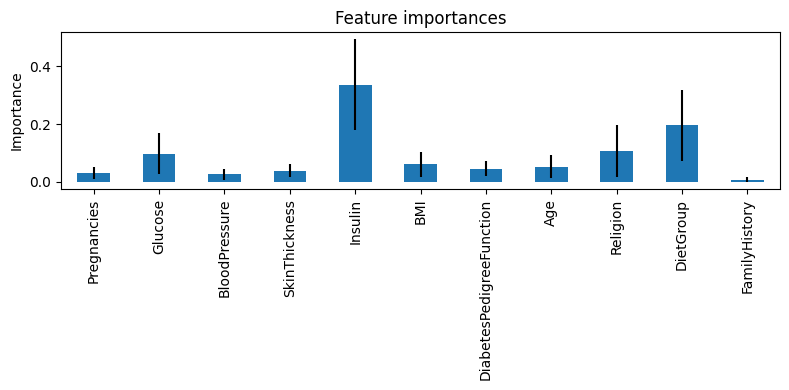

In [ ]:
# random forest feature importance
importances = rf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in rf.estimators_], axis=0)

feature_names = [i for i in df]
feature_names.remove('Outcome')

forest_importances = pd.Series(importances, index=feature_names)

plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Importance")
fig.tight_layout()